In [21]:
from sklearn import preprocessing, linear_model
from sklearn import metrics
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pydot
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei'

ModuleNotFoundError: No module named 'pydot'

In [14]:
# import data and omit NA
titanic = pd.read_csv("/Users/USER/Desktop/For-Python/datasets_11657_16098_train.csv",encoding="big5").dropna()
titanic.head()
titanic_df2 = titanic[['Sex','Pclass','Age','Survived']]
titanic_df2.head()

,Sex,Pclass,Age,Survived
1,female,1,38.0,1
3,female,1,35.0,1
6,male,1,54.0,0
10,female,3,4.0,1
11,female,1,58.0,1


In [15]:
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(titanic_df2['Sex'])
titanic_df2['Sex']=encoded_Sex
titanic_df2.head()

<ipython-input-15-645874b1ffff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df2['Sex']=encoded_Sex


,Sex,Pclass,Age,Survived
1,0,1,38.0,1
3,0,1,35.0,1
6,1,1,54.0,0
10,0,3,4.0,1
11,0,1,58.0,1


In [16]:
x=titanic_df2[['Sex','Pclass','Age']]
y=titanic_df2[['Survived']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20170816)

In [17]:
#standardize variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
sc.fit(x_test)
x_train_nor = sc.transform(x_train)
x_test_nor = sc.transform(x_test)

In [18]:
# train a model
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train_nor,y_train)
print(logit.coef_)
print(logit.intercept_)

[[-1.2497506  -0.26809397 -0.41998281]]
[0.71041016]


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# predict
pred_logit = logit.predict_proba(x_test_nor)
np.round(logit.predict_proba(x_test_nor), 3)

array([[0.099, 0.901],
       [0.578, 0.422],
       [0.145, 0.855],
       [0.671, 0.329],
       [0.087, 0.913],
       [0.648, 0.352],
       [0.522, 0.478],
       [0.06 , 0.94 ],
       [0.105, 0.895],
       [0.342, 0.658],
       [0.138, 0.862],
       [0.564, 0.436],
       [0.102, 0.898],
       [0.557, 0.443],
       [0.696, 0.304],
       [0.102, 0.898],
       [0.466, 0.534],
       [0.592, 0.408],
       [0.065, 0.935],
       [0.148, 0.852],
       [0.727, 0.273],
       [0.629, 0.371],
       [0.056, 0.944],
       [0.684, 0.316],
       [0.639, 0.361],
       [0.113, 0.887],
       [0.557, 0.443],
       [0.092, 0.908],
       [0.725, 0.275],
       [0.069, 0.931],
       [0.543, 0.457],
       [0.652, 0.348],
       [0.564, 0.436],
       [0.578, 0.422],
       [0.626, 0.374],
       [0.592, 0.408],
       [0.053, 0.947],
       [0.646, 0.354],
       [0.128, 0.872],
       [0.152, 0.848],
       [0.081, 0.919],
       [0.067, 0.933],
       [0.606, 0.394],
       [0.7

In [8]:
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_test, logit.predict(x_test_nor))
print(cnf)
#Accuracy=(15+27)/(15+0+13+27)
#TPR=(27)/(13+27) the bigger, the better
#FPR=(0)/(27+0) the smaller, the better

[[15  0]
 [13 27]]


findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


Confusion matrix, without normalization
[[15  0]
 [13 27]]


findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


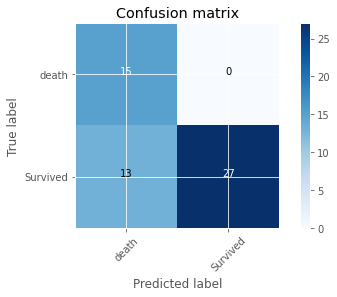

In [9]:
# visualize the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cnf, classes=['death','Survived'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)